# Advent of Code 2021
## [Day 20: Trench Map](https://adventofcode.com/2021/day/20)

['Text',
 array([[1, 2],
        [3, 4]]),
 array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]]),
 [(1,
   array([[0, 1, 1, 1, 0, 0, 0, 0, 0, 0],
          [0, 1, 1, 0, 1, 0, 0, 1, 1, 1],
          [0, 0, 1, 0, 0, 0, 0, 1, 1, 1],
          [1, 1, 1, 0, 0, 1, 0, 0, 0, 1],
          [1, 1, 1, 0, 1, 0, 0, 1, 1, 0],
          [0, 1, 1, 0, 1, 0, 0, 0, 0, 0],
          [1, 0, 0, 1, 0, 0, 1, 1, 0, 0],
          [0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
          [0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
          [0, 1, 1, 1, 1, 0, 1, 0, 0, 0]])),
  (2,
   array([[0, 1, 1, 1, 0, 1, 0, 1, 0, 0],
          [1, 1, 1, 0, 0, 1, 0, 1, 0, 0],
          [1, 1, 1, 1, 1, 0, 1, 0, 1, 1],
          [1, 0, 1, 1, 0, 1, 0, 1, 0, 1],
          [0, 1, 0, 1, 0, 0, 1, 1, 1, 0],
          [0, 0, 0, 1, 0, 0, 1, 1, 0, 1],
          [0, 1, 0, 1, 1, 1, 0, 1, 1, 0],
          [0, 0, 1, 1, 0, 0, 0, 1, 1, 0],
          [1, 1, 0, 1, 0, 0, 1, 1, 0, 1],
          [1, 0, 0, 1, 0, 0, 0, 1, 1, 0]])),
  (3,
   array([[1, 0, 0, 1, 0, 0, 1, 1, 0, 0],
          [0, 0, 1, 0, 0, 0, 1, 1, 1, 0],
          [0, 0, 1, 0, 1, 1, 0, 0, 0, 1],
          [1, 0, 0, 0, 1, 0, 1, 1, 0, 0],
          [1, 0, 0, 0, 1, 1, 1, 1, 1, 1],
          [0, 1, 0, 1, 0, 1, 1, 0, 1, 0],
          [1, 0, 1, 1, 0, 0, 1, 0, 0, 1],
          [1, 1, 1, 1, 1, 0, 1, 1, 0, 1],
          [0, 0, 1, 0, 0, 1, 1, 0, 1, 0],
          [1, 0, 0, 1, 0, 0, 0, 0, 1, 1]]))]]
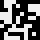
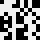
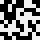

In [1]:
import numpy as np 
import PIL.Image
from io import BytesIO
import IPython.display

import html
html_formatter = get_ipython().display_formatter.formatters['text/html']

def bool_array_to_image(a, fmt='png'):
    a = (a.astype(np.uint8) * 240)
    f = BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    return IPython.display.Image(data=f.getvalue())

def double_bitmap(a):
    (h, w) = a.shape
    return np.tile(a.reshape((-1, 1)), 2).reshape((h, w*2))

def quad_bitmap(a):
    return double_bitmap(double_bitmap(a).T).T

def ndarray_to_html(a):
    if len(a.shape) == 2 and a.max() <= 1 and a.min() >= 0:
        while a.size < 1024:
            a = quad_bitmap(a)
        
        for bundle in bool_array_to_image(a)._repr_mimebundle_():
            for mimetype, b64value in bundle.items():
                if mimetype.startswith('image/'):
                    src = f'data:{mimetype};base64,{b64value}'
                    return f'<img src="{src}">'
    else:
        return "<pre>{}</pre>".format(html.escape(repr(a)))

html_formatter.for_type(np.ndarray, ndarray_to_html)

def item_to_html(item):
    formatter = html_formatter.for_type(type(item))
    if callable(formatter):
        item = formatter(item)

    if callable(getattr(item, '_repr_mimebundle_', None)):
        for bundle in item._repr_mimebundle_():
            for mimetype, b64value in bundle.items():
                if mimetype.startswith('image/'):
                    src = f'data:{mimetype};base64,{b64value}'
                    return f'<img src={src}>'
    
    if not formatter:
        item = '<tt>{}</tt>'.format(html.escape(repr(item)))
    return f'<span style="margin-left:0.2em">{item}</span>'

def list_to_html(l):
    items = [item_to_html(item) for item in l]
    return '<tt style="display:flex;flex-wrap:wrap;align-items:center">[{}]</tt>'.format(', '.join(items))

html_formatter.for_type(list, list_to_html)

def tuple_to_html(l):
    items = (item_to_html(item) for item in l)
    return '<tt style="display:flex;flex-wrap:wrap;align-items:center">({})</tt>'.format(', '.join(items))

html_formatter.for_type(tuple, tuple_to_html)

["Text", np.array([[1,2],[3,4]]), np.eye(10), [(i, np.random.randint(0,2,(10,10))) for i in range(1,4)]]

In [2]:
import numpy as np
import re

In [3]:
def split_input_sections(input_lines):
    current_section = []
    sections = [current_section]
    for line in input_lines:
        line = line.strip()
        if len(line) > 0:
            current_section.append(line)
        else:
            current_section = []
            sections.append(current_section)
    return sections

def parse_aoc_line(line):
    if re.match(r'^[.#]+$', line):
        return np.array(list(line)) == '#'
    elif re.match(r'^[01]+$', line):
        return np.array(list(line)) == '1'
    elif len(line) > 4 and re.match(r'^[\d]+$', line):
        return np.array(list(line), dtype=int)
    elif re.match(r'^[,\s\d-]*$', line):
        return np.array(re.split('[,\s]+', line), dtype=int)
    else:
        return line

def parse_aoc_lines(lines):
    if callable(getattr(lines, 'split', None)) and '\n' in lines:
        lines = lines.split('\n')
    
    arrays = [parse_aoc_line(line) for line in lines]

    if len(arrays) == 1:
        return arrays[0]
    else:
        return np.array(arrays)

array([[ True, False,  True, ...,  True, False,  True],
       [ True, False,  True, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       ...,
       [ True, False, False, ...,  True, False, False],
       [False,  True, False, ...,  True, False,  True],
       [False, False,  True, ...,  True, False, False]])
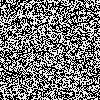

In [4]:
import aocd
input_data = aocd.get_data(year=2021, day=20).split('\n')
algorithm, input_image = [parse_aoc_lines(s) for s in split_input_sections(input_data)]
input_image

In [5]:
input_data[0]

'#.#.....##...##..#.#......#.#...#.#.#...###.##......###.##.##..##.#...#.....###.#.....#.#.#...#.#..###.###..###..#..##..###..##..##.##.#..###########.##....#.#......#...#.###..###...#.####..########.#####.#.#..##.##.##..###.##.####.#..##.##..#...#####..#.#.##.##...##..#..##.....###.#.#....####.##.#...##.########.#.##.#.....###....#..###.####....############.#.##...#.####...#...##.#.#..#..#......#..##...#.########.#.#...#####..#..######.#.#.....#####...##.###.#.#.##.........#.#.##..##.#..#..##..##.###.##.##.'

In [6]:
len(algorithm)

512

In [7]:
test_algorithm = parse_aoc_line('..#.#..#####.#.#.#.###.##.....###.##.#..###.####..#####..#....#..#..##..###..######.###...####..#..#####..##..#.#####...##.#.#..#.##..#.#......#.###.######.###.####...#.##.##..#..#..#####.....#.#....###..#.##......#.....#..#..#..##..#...##.######.####.####.#.#...#.......#..#.#.#...####.##.#......#..#...##.#.##..#...##.#.##..###.#......#.#.......#.#.#.####.###.##...#.....####.#..#..#.##.#....##..#.####....##...##..#...#......#.#.......#.......##..####..#...#.#.#...##..#.#..###..#####........#..####......#..#')
test_image = parse_aoc_lines([
    '#..#.',
    '#....',
    '##..#',
    '..#..',
    '..###',
])
test_image

array([[ True, False, False,  True, False],
       [ True, False, False, False, False],
       [ True,  True, False, False,  True],
       [False, False,  True, False, False],
       [False, False,  True,  True,  True]])

### Part 1

In [8]:
padded_image = np.pad(input_image, 1, constant_values=0)

In [9]:
i, j = 0, 0
padded_image[i:i+3,j:j+3]

array([[False, False, False],
       [False,  True, False],
       [False,  True, False]])

In [10]:
region = padded_image[i:i+3,j:j+3]

In [11]:
region.ravel().astype(int)

array([0, 0, 0, 0, 1, 0, 0, 1, 0])

In [12]:
def bits_to_int(region):
    return int(''.join(str(int(x)) for x in region), base=2)
def bits_to_int(region):
    return np.packbits(np.concatenate([[0]*(16-len(region)), region]))[::-1].copy().view('int16')[0]
    
bits_to_int(region.ravel())

18

In [13]:
algorithm[18]

False

In [14]:
test_image

array([[ True, False, False,  True, False],
       [ True, False, False, False, False],
       [ True,  True, False, False,  True],
       [False, False,  True, False, False],
       [False, False,  True,  True,  True]])

In [15]:
def enhance_image(input_image, algorithm=algorithm):
    padded_image = np.pad(input_image, 20, constant_values=0)
    output_image = np.zeros_like(padded_image)
    # print(input_image.shape, padded_image.shape, output_image.shape)
    for i in range(1, padded_image.shape[0]-1):
        for j in range(1, padded_image.shape[1]-1):
            region = padded_image[i-1:i+2, j-1:j+2]
            index = bits_to_int(region.ravel())
            # print(i, j, region.ravel().astype(int), index, algorithm[index].astype(int))
            output_image[i,j] = algorithm[index]
    return output_image[1:-1,1:-1]

enhance_image(test_image, test_algorithm).shape

(43, 43)

In [16]:
enhance_image(enhance_image(test_image, test_algorithm), test_algorithm).sum()

35

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])
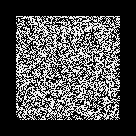

In [17]:
enhance_image(enhance_image(input_image))[20:-20,20:-20]

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])
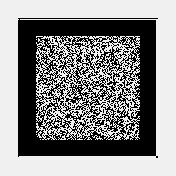

In [18]:
output_image = enhance_image(enhance_image(input_image))
output_image

#### Part 1 Answer
Start with the original input image and apply the image enhancement algorithm twice, being careful to account for the infinite size of the images.  
**How many pixels are lit in the resulting image?**

In [19]:
output_image.sum()

17742

### Part 2

array([[False, False, False, False, False, False, False,  True, False],
       [False,  True, False, False,  True, False,  True, False, False],
       [ True, False,  True, False, False, False,  True,  True,  True],
       [ True, False, False, False,  True,  True, False,  True, False],
       [ True, False, False, False, False, False,  True, False,  True],
       [False,  True, False,  True,  True,  True,  True,  True, False],
       [False, False,  True, False,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True, False,  True,  True, False],
       [False, False, False, False,  True,  True,  True, False, False]])
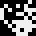

In [20]:
def enhance2(input_image, alg=algorithm):
    return enhance_image(enhance_image(input_image, alg), alg)[36:-36,36:-36]

enhance2(test_image, test_algorithm)

array([[False, False, False, ..., False,  True, False],
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False,  True,  True],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])
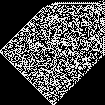

In [21]:
def enhance50(input_image, alg=algorithm):
    result = input_image
    for _ in range(25):
        result = enhance2(result, alg)
    return result
test_result = enhance50(test_image, test_algorithm)
test_result

In [22]:
test_result.sum()

3351

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True, False, ..., False, False, False],
       [False,  True,  True, ...,  True,  True,  True],
       ...,
       [False, False, False, ...,  True,  True, False],
       [False, False, False, ..., False, False,  True],
       [False, False, False, ...,  True, False, False]])
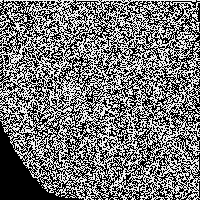

In [23]:
output_image = enhance50(input_image, algorithm)
output_image

#### Part 2 Answer
Start again with the original input image and apply the image enhancement algorithm 50 times.  
**How many pixels are lit in the resulting image?**

In [24]:
output_image.sum()

19766